In [ ]:
# Uncomment the following line if you need to install prophet
# !pip install prophet

# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Importing the dataset
df = pd.read_csv('sales_aggregated.csv')
df

,Product,Size,Month,Sales
0,ALF Boys Ink Trousers,100,2022-01-01,6.0
1,ALF Boys Ink Trousers,100,2022-02-01,7.0
2,ALF Boys Ink Trousers,100,2022-03-01,1.0
3,ALF Boys Ink Trousers,100,2022-04-01,0.0
4,ALF Boys Ink Trousers,100,2022-05-01,1.0
...,...,...,...,...
19839,WHHS Snr Trouser,96,2025-01-01,6.0
19840,WHHS Snr Trouser,96,2025-02-01,5.0
19841,WHHS Snr Trouser,96,2025-03-01,2.0
19842,WHHS Snr Trouser,96,2025-04-01,0.0


##### Creating a dataframe wiht the forecasted demand for every product and size combination for the next 6 months

In [ ]:
# Function to forecast demand for a single product-size combination
def forecast_demand(df, product, size, forecast_periods=6):
    # Filter data for specific product and size
    df_subset = df[(df['Product'] == product) & (df['Size'] == size)][['Month', 'Sales']]
    df_subset = df_subset.rename(columns={'Month': 'ds', 'Sales': 'y'})
    
    # Initialize and fit Prophet model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_subset)
    
    # Create future dataframe for the next 6 months
    future = model.make_future_dataframe(periods=forecast_periods, freq='ME')
    
    # Generate forecast
    forecast = model.predict(future)
    
    # Extract forecasted values for the next 6 months
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(forecast_periods)
    forecast['Product'] = product
    forecast['Size'] = size
    
    return forecast

# Get unique product-size combinations
product_size_combinations = df[['Product', 'Size']].drop_duplicates()

# Generate forecasts for all product-size combinations
forecasts = []
for _, row in product_size_combinations.iterrows():
    product = row['Product']
    size = row['Size']
    forecast = forecast_demand(df, product, size)
    forecasts.append(forecast)

# Combine all forecasts
forecast_df = pd.concat(forecasts, ignore_index=True)

# Uncomment the following line if you want to save the forecasted data to a CSV file
#forecast_df.to_csv('demand_forecast.csv', index=False)

11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:09 - cmdstanpy - INFO - Chain [1] done processing
11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:11 - cmdstanpy - INFO - Chain [1] done processing
11:45:11 - cmdstanpy - INFO - Chain [1] start processing
11:45:11 - cmdstanpy - INFO - Chain [1] done processing
11:45:11 - cmdstanpy - INFO - Chain [1] start processing
11:45:11 - cmdstanpy - INFO - Chain [1] done processing
11:45:11 - cmdstanpy - INFO - Chain [1] start processing
11:45:11 - cmdstanpy - INFO - Chain [1] done processing
11:45:12 - cmdstanpy - INFO - Chain [1] start processing
11:45:12 - cmdstanpy - INFO - Chain [1]

In [5]:
# Dataframe forecasting every possible product-size combination each month for the next 6 months
forecast_df[['ds', 'Product', 'Size', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df

,ds,yhat,yhat_lower,yhat_upper,Product,Size
0,2025-05-31,3.481585,2.265936,4.729572,ALF Boys Ink Trousers,100
1,2025-06-30,2.223000,1.075203,3.496116,ALF Boys Ink Trousers,100
2,2025-07-31,2.856316,1.644484,4.099001,ALF Boys Ink Trousers,100
3,2025-08-31,2.176906,0.975323,3.477174,ALF Boys Ink Trousers,100
4,2025-09-30,-1.003938,-2.202286,0.223019,ALF Boys Ink Trousers,100
...,...,...,...,...,...,...
2899,2025-06-30,0.424884,-0.573393,1.468636,WHHS Snr Trouser,96
2900,2025-07-31,0.098374,-0.934306,1.146107,WHHS Snr Trouser,96
2901,2025-08-31,1.064419,-0.011772,2.096514,WHHS Snr Trouser,96
2902,2025-09-30,1.217512,0.178702,2.322387,WHHS Snr Trouser,96


##### Visualising the forecasted demand (sales) for the next 6 months for 3 products

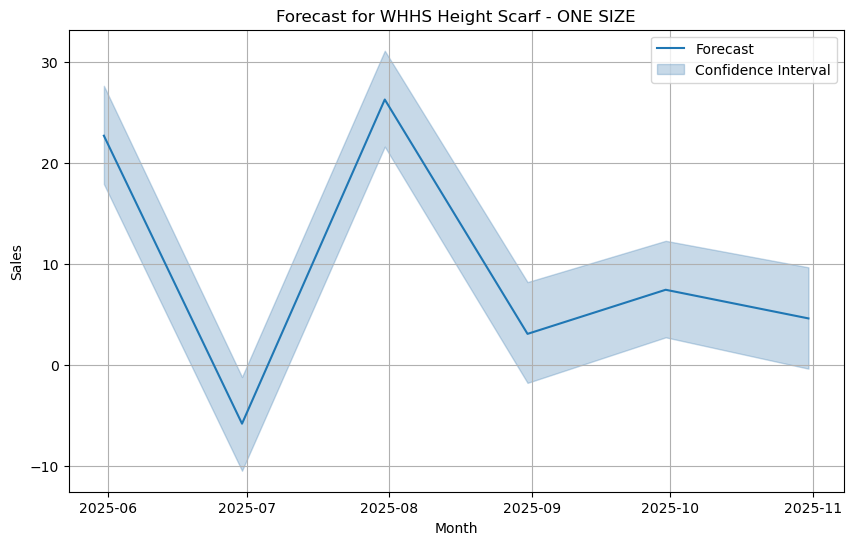

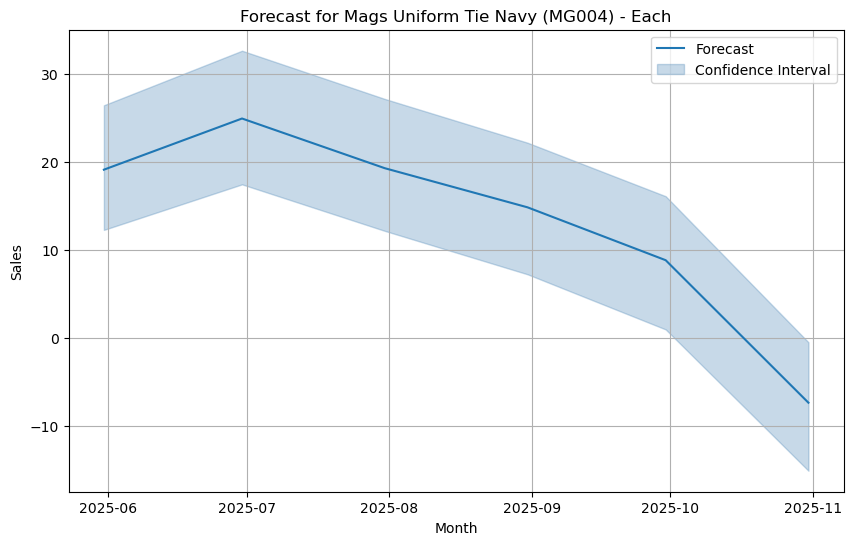

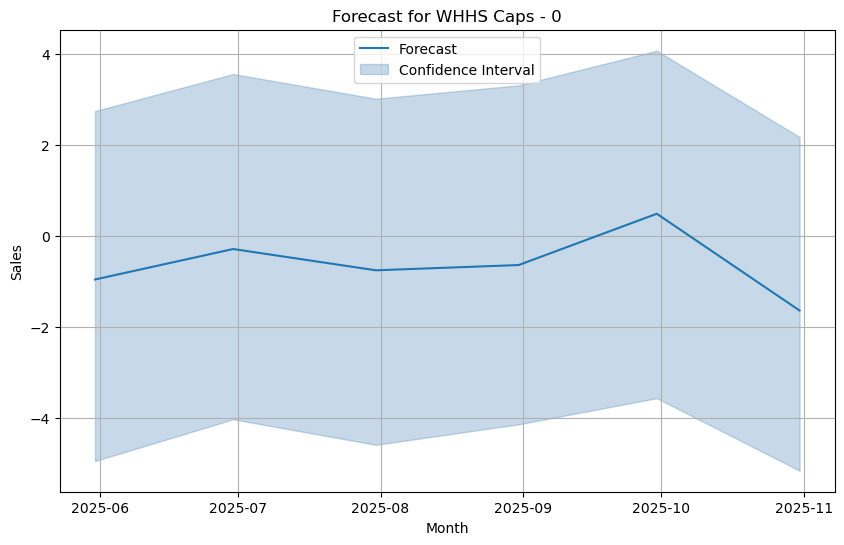

In [9]:
# List of selected products
selected_products = ["WHHS Height Scarf", "Mags Uniform Tie Navy (MG004)", "WHHS Caps"] 

# Looping through each product
for product_name in selected_products:
    # Getting all unique sizes for the current product
    sizes = forecast_df[forecast_df['Product'] == product_name]['Size'].unique()
    
    # Looping through each size for the current product
    for size in sizes:
        # Filtering the DataFrame for the specified product and size
        sample_forecast = forecast_df[(forecast_df['Product'] == product_name) & (forecast_df['Size'] == size)]
        
        # Creating the plot for each product
        plt.figure(figsize=(10, 6))
        plt.plot(sample_forecast['ds'], sample_forecast['yhat'], label='Forecast')
        plt.fill_between(sample_forecast['ds'], sample_forecast['yhat_lower'], sample_forecast['yhat_upper'], color='steelblue', alpha=0.3, label='Confidence Interval')
        plt.title(f'Forecast for {product_name} - {size}')
        plt.xlabel('Month')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.show()

---

### Order Logic

In [ ]:
# Renaming columns for clarity
forecast_df = forecast_df.rename(columns={
    'ds': 'Month',
    'yhat': 'Forecasted_Sales',
    'yhat_lower': 'Lower_Bound',
    'yhat_upper': 'Upper_Bound'
})

In [ ]:
# Display the forecast DataFrame
forecast_df

,Month,Forecasted_Sales,Lower_Bound,Upper_Bound,Product,Size
0,2025-05-31,3.481585,2.258892,4.703833,ALF Boys Ink Trousers,100
1,2025-06-30,2.223000,1.105038,3.458282,ALF Boys Ink Trousers,100
2,2025-07-31,2.856316,1.635935,4.048913,ALF Boys Ink Trousers,100
3,2025-08-31,2.176906,0.908931,3.493084,ALF Boys Ink Trousers,100
4,2025-09-30,-1.003938,-2.336393,0.195378,ALF Boys Ink Trousers,100
...,...,...,...,...,...,...
2899,2025-06-30,0.424884,-0.567903,1.505830,WHHS Snr Trouser,96
2900,2025-07-31,0.098374,-0.918332,1.087721,WHHS Snr Trouser,96
2901,2025-08-31,1.064419,0.136203,2.095612,WHHS Snr Trouser,96
2902,2025-09-30,1.217512,0.161125,2.323995,WHHS Snr Trouser,96


In [ ]:
# Importing the inventory data
inventory_df = pd.read_csv('inventory_data.csv')
inventory_df

,Category,Product,Code,Size,Stock On Hand,Lead Time (Weeks)
0,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -100,100,38,5
1,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -104,104,30,5
2,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -108,108,15,5
3,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -112,112,8,5
4,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -116,116,5,5
...,...,...,...,...,...,...
479,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -80,80,36,5
480,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -84,84,45,5
481,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -88,88,50,5
482,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -92,92,45,5


In [ ]:
# Converting the lead time from weeks to months
inventory_df['Lead Time (Months)'] = inventory_df['Lead Time (Weeks)'] / 4.345

# Merging inventory data with forecast data
merged_df = forecast_df.merge(inventory_df, on=['Product', 'Size'], how='left')

# Calculating demand during lead time
order_suggestions = []

##### Calculating (for each product-size pair) the demand during lead time (including fractional months), safety stock, and the resulting order quantity after subtracting current stock.

In [ ]:
for (product, size), group in merged_df.groupby(['Product', 'Size']):
    lead_time_months = group['Lead Time (Months)'].iloc[0]
    stock_on_hand = group['Stock On Hand'].iloc[0]
    
    # Sorting the forecast by month
    group = group.sort_values('Month')
    
    # Number of full months and fraction of next month
    full_months = int(np.floor(lead_time_months))
    fraction_month = lead_time_months - full_months
    
    # Forecasting for full months
    demand = group['Forecasted_Sales'].iloc[:full_months].sum() if full_months > 0 else 0
    
    # Adding fractional month demand if needed
    if fraction_month > 0 and full_months < len(group):
        demand += group['Forecasted_Sales'].iloc[full_months] * fraction_month
    
    # Safety stock (based on forecast range)
    safety_stock = (group['Upper_Bound'].iloc[:full_months].sum() - 
                    group['Forecasted_Sales'].iloc[:full_months].sum()) if full_months > 0 else 0
    
    # Order quantity calculation
    order_qty = max(0, demand + safety_stock - stock_on_hand)
    
    order_suggestions.append({
        'Product': product,
        'Size': size,
        'Lead Time Demand': demand,
        'Safety Stock': safety_stock,
        'Stock On Hand': stock_on_hand,
        'Order Quantity': round(order_qty)
    })

| Step            | Formula / Logic                                                                                 | Explanation                 |
|-----------------|-------------------------------------------------------------------------------------------------|----------------------------------------------|
| Lead Time Split | `full_months = floor(lead_time_months)` <br> `fraction_month = lead_time_months - full_months`  | Split lead time into whole months + decimal  |
| Lead Time Demand| `demand = sum(Forecasted_Sales for full_months)` <br> `+ Forecasted_Sales[next_month] * fraction_month` | Total demand during lead time (whole months + part of next month) |
| Safety Stock    | `safety_stock = sum(Upper_Bound - Forecasted_Sales for full_months)`                            | Extra stock = Forecast buffer for variability |
| Order Quantity  | `order_qty = max(0, demand + safety_stock - stock_on_hand)`                                     | What you need to order after using current stock |


In [47]:
# Creating a dataframe from the order sugestions
order_df = pd.DataFrame(order_suggestions)
order_df

,Product,Size,Lead Time Demand,Safety Stock,Stock On Hand,Order Quantity
0,ALF Boys Ink Trousers,100,3.816698,1.222248,38,0
1,ALF Boys Ink Trousers,104,1.194969,1.954576,30,0
2,ALF Boys Ink Trousers,108,-2.377360,1.318218,15,0
3,ALF Boys Ink Trousers,112,0.364181,1.108393,8,0
4,ALF Boys Ink Trousers,116,-0.356398,0.472282,5,0
...,...,...,...,...,...,...
479,WHHS Snr Trouser,80,2.412234,2.604991,36,0
480,WHHS Snr Trouser,84,1.822033,1.634978,45,0
481,WHHS Snr Trouser,88,-0.344971,1.904287,50,0
482,WHHS Snr Trouser,92,3.136982,1.329536,45,0


In [48]:
order_df['Order Quantity'].value_counts()

Order Quantity
0     470
1       9
4       2
10      1
5       1
2       1
Name: count, dtype: int64

---